In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize']=(7,7)
plt.rcParams.update({'font.size': 11})
# %config InlineBackend.close_figures=False # keep figures open in pyplot

## Plotting the function
$$ F(x)=\frac{x}{\sin x} $$

In [2]:
def sinx_x(limit=[-20, 20, -20, 20], size=10):
    def load(x): return x/math.sin(x)

    f = np.vectorize(load)
    a = size
    for i in np.arange(-a, a+1):
        x = np.linspace(i*math.pi+0.00000001, i *
                        math.pi+math.pi-0.00000001, 100)
        y = f(x)
        plt.plot(x, y, 'tab:blue', linewidth=3)
    plt.xlim(limit[0], limit[1])
    plt.ylim(limit[2], limit[3])
    plt.title('f=x/sin(x) Plot')
    plt.xlabel('x')
    plt.ylabel('f')
    plt.axvline(c="black",lw=1,ls='--')
    plt.axhline(c="black",lw=1,ls='--')
    ax = plt.gca()
    ax.set_aspect('equal')

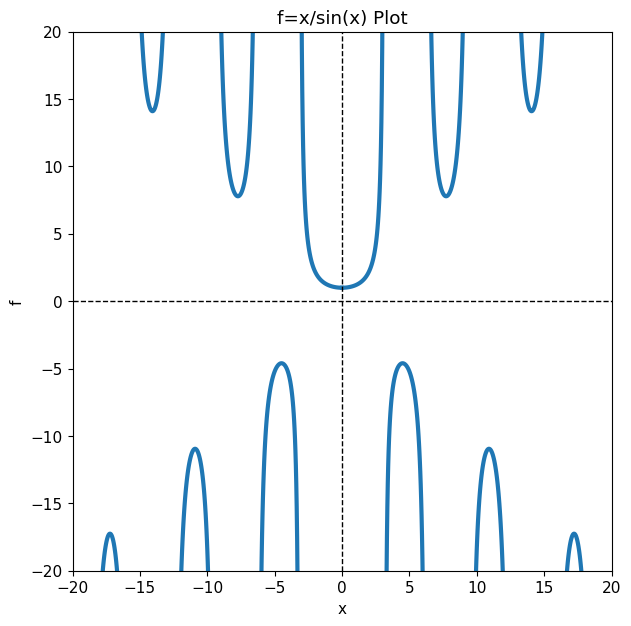

In [3]:
sinx_x()

## Given f -> x?
$$
F_{NL}(x)\approx F_L(x) = c_1+c_2x \implies F_L(x)=\big(F_{NL}(x_0)-F'_{NL}(x_0)*x_0\big)+F'_{NL}(x_0)*x
$$
$$
F_{NL}(x) \equiv f=\frac{x}{\sin x},\quad F_L(x)\equiv f = \Big(\frac{x_0}{\sin x_0}-\frac{\sin x_0 - x_0\cos x_0}{\sin^2 x_0}x_0\Big)+\frac{\sin x_0 - x_0\cos x_0}{\sin^2 x_0}x
$$

In [4]:
def F_linear(x_0, f):
    a = (math.sin(x_0)-x_0*math.cos(x_0))/(math.sin(x_0))**2
    b = x_0/math.sin(x_0)
    x = (f-(b-a*x_0))/a
    return x


def F_nlinear(x): return x/math.sin(x)


def f_line(f, xlim1, xlim2): return plt.plot(np.linspace(xlim1, xlim2, 100),
                                             np.full((100), f), '-k', linewidth=1.5)


def solve(x_initial=2.5, f=1.2, plotarea=[-3, 3, 0, 5], view=True):
    x_coord = np.array([x_initial, x_initial])
    y_coord = np.array([0, F_nlinear(x_initial)])
    tolerance = 0.000001
    while True:
        x_sol = F_linear(x_coord[-1], f)
        x_coord = np.append(x_coord, x_sol)
        y_coord = np.append(y_coord, f)

        f_esti = F_nlinear(x_sol)
        x_coord = np.append(x_coord, x_sol)
        y_coord = np.append(y_coord, f_esti)

        error = abs((f-f_esti)/f)
        if error <= tolerance:
            if view == True:
                print("Solution is : x = %f" % (x_sol))
                print("Corresponding 'f' = %f" % (F_nlinear(x_sol)))
            break
        elif x_coord.size/2 > 200:
            x_sol = None
            if view == True:
                print("Warning! maximum allowed no of iterations reached")
            break
    if view == True:
        sinx_x(plotarea)
        f_line(f, plotarea[0], plotarea[1])
        plt.plot(x_coord, y_coord, 'o-r', linewidth=1, ms=2)
        plt.plot(x_coord[0],y_coord[0],'ob', ms=10, label='initial guess')
        plt.plot(x_coord[-1],y_coord[-1],'og', ms=10, label='obtained solution')
        plt.axvline(c="black",lw=1,ls='--')
        plt.axhline(c="black",lw=1,ls='--')
        # plt.legend()
        print("Number of iterations = %d" % ((x_coord.size)/2-1))
    else:
        return x_sol


### Examples

Solution is : x = 1.026738
Corresponding 'f' = 1.200000
Number of iterations = 6


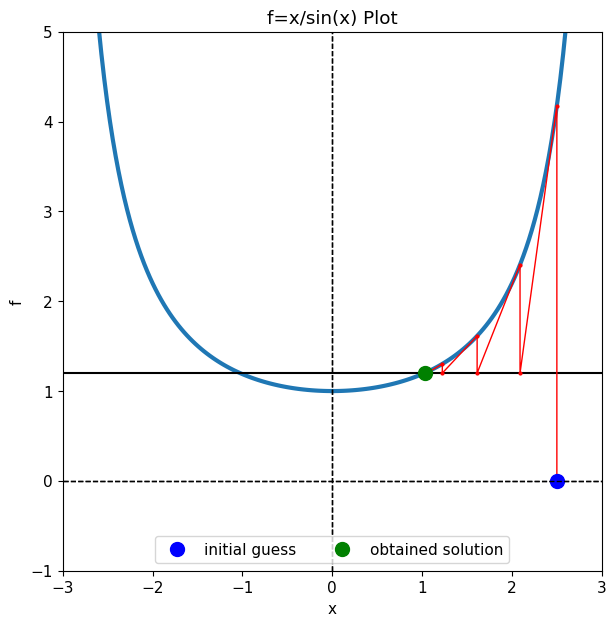

In [5]:
solve(x_initial=2.5, f=1.2, plotarea=[-3, 3, -1, 5], view=True)
plt.legend(loc='lower center', ncol=3)

Solution is : x = 1.026738
Corresponding 'f' = 1.200000
Number of iterations = 33


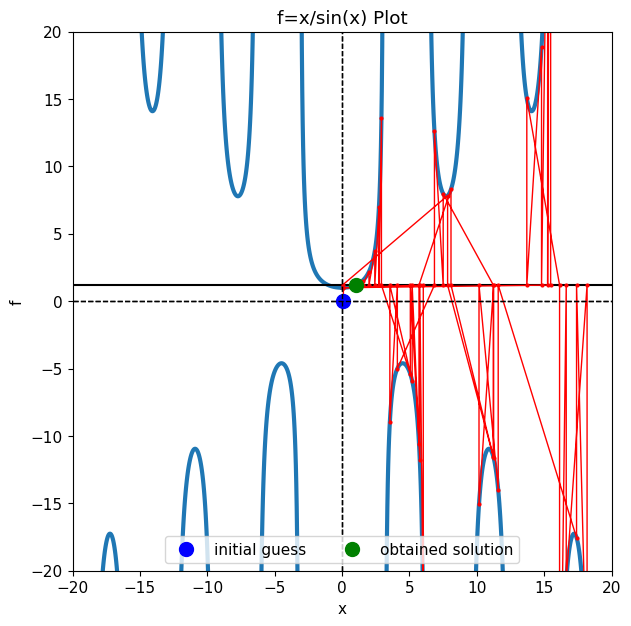

In [6]:
solve(x_initial=0.1001, f=1.2, plotarea=[-20,20,-20,20], view=True)
plt.legend(loc='lower center', ncol=3)

Solution is : x = 7.068174
Corresponding 'f' = 10.000000
Number of iterations = 6
Solution is : x = 2.852342
Corresponding 'f' = 10.000000
Number of iterations = 9
Solution is : x = -8.423204
Corresponding 'f' = 10.000000
Number of iterations = 5


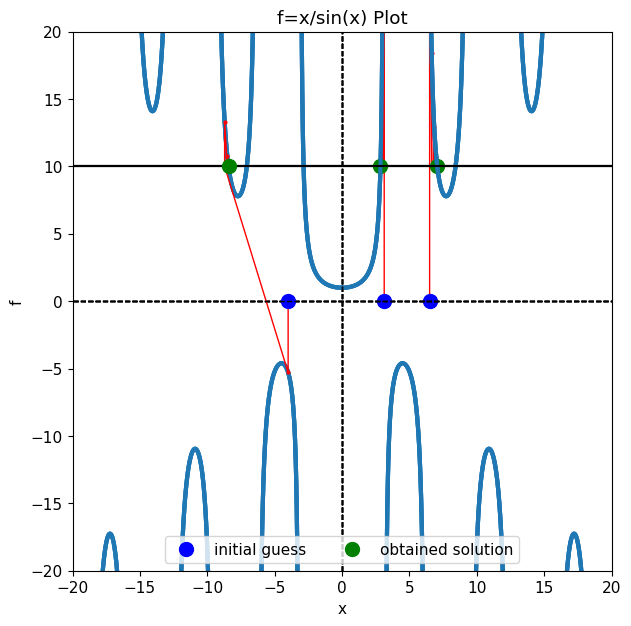

In [7]:
solve(x_initial=6.5, f=10, plotarea=[-20,20,-20,20], view=True)
plt.legend(loc='lower center', ncol=3)
solve(x_initial=3.13, f=10, plotarea=[-20,20,-20,20], view=True)
solve(x_initial=-4, f=10, plotarea=[-20,20,-20,20], view=True)

Warning! maximum allowed no of iterations reached
Number of iterations = 200


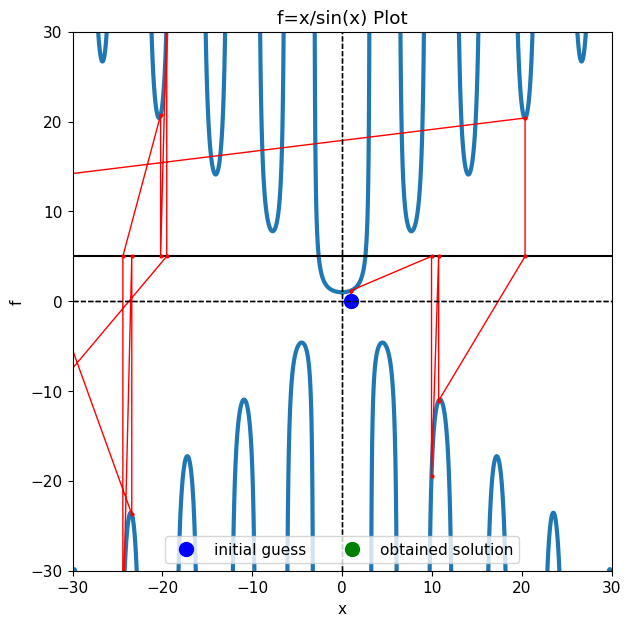

In [8]:
solve(x_initial=1, f=5, plotarea=[-30,30,-30,30], view=True)
plt.legend(loc='lower center', ncol=3)

## Plotting the solution curve

In [9]:
def plotsol(a):
    if F_nlinear(a) > 0:
        f_grid = np.linspace(20, 1, 500)
    elif F_nlinear(a) < 0:
        f_grid = np.linspace(-20, -1, 500)
    x_grid = np.array([])
    for fi in f_grid:
        x_new = solve(x_initial=a, f=fi, view=False)
        if x_new == None:
            break
        x_grid = np.append(x_grid, x_new)
    plt.plot(x_grid, f_grid[0:len(x_grid)], lw=2)
    plt.plot(a, 0, 'ob', ms=5, label='initial guess')
    plt.axvline(c="black", lw=1, ls='--')
    plt.axhline(c="black", lw=1, ls='--')
    limit = [-20, 20, -20, 20]
    plt.xlim(limit[0], limit[1])
    plt.ylim(limit[2], limit[3])
    plt.title('f=F(x) Solution Plot')
    plt.xlabel('x')
    plt.ylabel('f')
    ax = plt.gca()
    ax.set_aspect('equal')

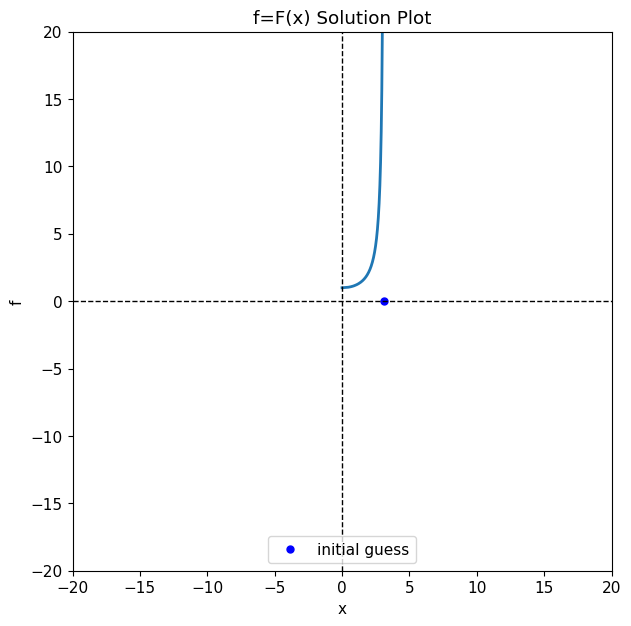

In [10]:
plotsol(3.12)
plt.legend(loc='lower center', ncol=3)

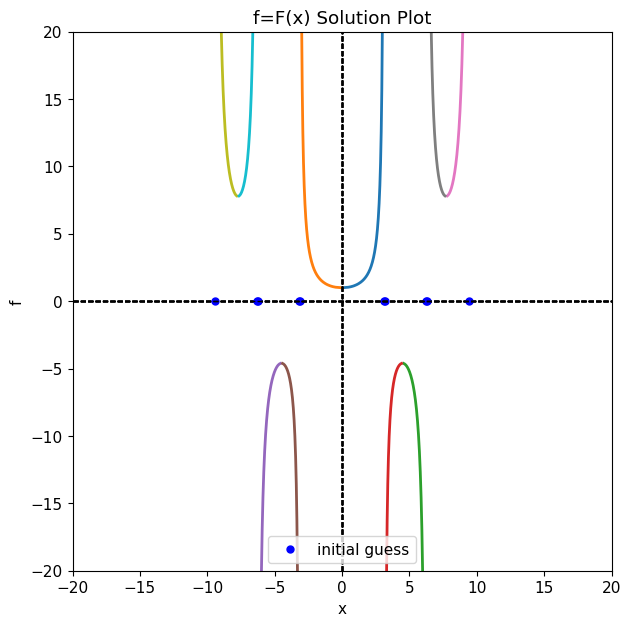

In [11]:
plotsol(3.12)
plt.legend(loc='lower center', ncol=3)
plotsol(-3.12)
plotsol(math.pi+3.12)
plotsol(math.pi+0.02)
plotsol(-math.pi-3.12)
plotsol(-math.pi-0.02)
plotsol(2*math.pi+3.12)
plotsol(2*math.pi+0.02)
plotsol(-2*math.pi-3.12)
plotsol(-2*math.pi-0.02)
